# Importing libraries

In [1]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt

# Utils

In [2]:
dx = 1e-6

def phi(alpha):
    return (alpha ** 3) + 3 * (alpha ** 2) - 1

x = np.linspace(-1, 1, 1000)
y = phi(x)

# Armijo method

In [3]:
def armijo(phi, eps=0.2, alpha_0=1):
    alpha = alpha_0
    
    while phi(alpha) <= phi(0) + eps * alpha * derivative(phi, 0, dx=dx):
        alpha = 2 * alpha

    while phi(alpha) > phi(0) + eps * alpha * derivative(phi, 0, dx=dx):
        alpha = alpha / 2

    return alpha

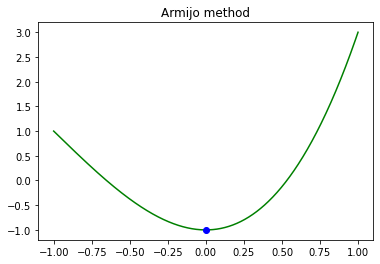

In [4]:
plt.title('Armijo method')
x_sol = armijo(phi)
y_sol = phi(x_sol)
plt.plot(x, y, 'g')
plt.plot(x_sol, y_sol, 'bo')
plt.show()

# Goldstein method

In [5]:
def goldstein(phi, eps=0.2, alpha_0=1, t=2):
    alpha = alpha_0
    a = 0
    b = np.inf

    while True:
        if phi(alpha) <= phi(0) + eps * alpha * derivative(phi, 0, dx=dx):
            if phi(alpha) >= phi(0) + (1 - eps) * alpha * derivative(phi, 0, dx=dx):
                return alpha
            a = alpha 
            if b < np.inf:
                alpha = (a + b) / 2
            else:
                alpha = t * alpha
        else:
            b = alpha
            alpha = (a + b) / 2

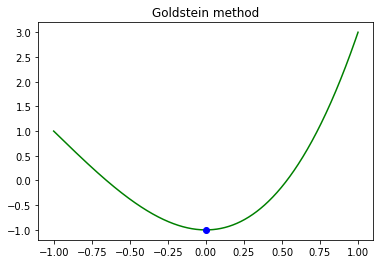

In [6]:
plt.title('Goldstein method')
x_sol = goldstein(phi)
y_sol = phi(x_sol)
plt.plot(x, y, 'g')
plt.plot(x_sol, y_sol, 'bo')
plt.show()

# Wolfe method

## Weak-Wolfe

In [7]:
def weak_wolfe(phi, eps=0.2, eps_bar=0.3, alpha_0=1):
    alpha = alpha_0

    while derivative(phi, alpha, dx=dx) < eps_bar * derivative(phi, 0, dx=dx):
        alpha = alpha * 2

    while phi(alpha) > phi(0) + eps * alpha * derivative(phi, 0, dx=dx):
        alpha = alpha / 2

    return alpha

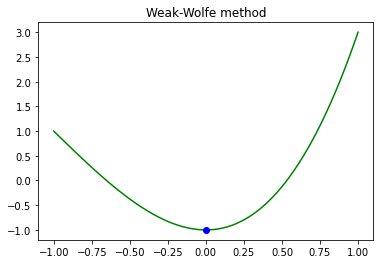

In [8]:
plt.title('Weak-Wolfe method')
x_sol = weak_wolfe(phi)
y_sol = phi(x_sol)
plt.plot(x, y, 'g')
plt.plot(x_sol, y_sol, 'bo')
plt.show()

## Strong-Wolfe

In [9]:
def strong_wolfe(phi, eps=0.2, eps_bar=0.3, alpha_0=1):
    alpha = alpha_0

    while phi(alpha) <= phi(0) + eps * alpha * derivative(phi, 0, dx=dx):
        alpha = 2 * alpha

    while abs(derivative(phi, alpha, dx=dx)) > eps_bar * abs(derivative(phi, 0, dx=dx)):
        alpha = alpha / 2

    while phi(alpha) > phi(0) + eps * alpha * derivative(phi, 0, dx=dx):
        alpha = alpha / 2

    return alpha

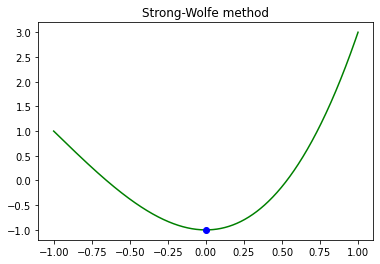

In [10]:
plt.title('Strong-Wolfe method')
x_sol = strong_wolfe(phi)
y_sol = phi(x_sol)
plt.plot(x, y, 'g')
plt.plot(x_sol, y_sol, 'bo')
plt.show()